In [1]:
pip install psycopg2 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import sqlalchemy
import pprint
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
import numpy as np



In [3]:
#Engine 
engine = create_engine('postgresql://zhaoaijie:@localhost:5432/sql')
connection = engine.connect()

In [4]:
#Testing Connection 
departments = pd.read_sql('select * from departments', connection)
departments

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [5]:

### Import the Employees table"
Employee_df = pd.read_sql('select * from employees', connection)
Employee_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/53,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,11/18/54,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1/30/58,Berry,Babb,F,1992-03-21
3,421786,s0001,9/28/57,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,10/28/52,Abdelkader,Baumann,F,1991-01-18


In [6]:
### Import the Departments table"
departments = pd.read_sql('select * from departments', connection)
departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [7]:
 #Pulling Salary Data
Salaries_df=pd.read_sql('Select * From Salaries', connection)

Salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [8]:

### Import the Department Manager table
dept_manager = pd.read_sql('select * from dept_manager', connection, parse_dates=['from_date', 'to_date'])
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [9]:
### Import the Titles table
titles = pd.read_sql('select * from titles', connection)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [10]:
#Collecting the salaries into an empty list
salaries=[]

for x in np.arange(len(Salaries_df['salary'].values)):
    response=Salaries_df['salary'][x]
    salaries.append(response)
    x+=1

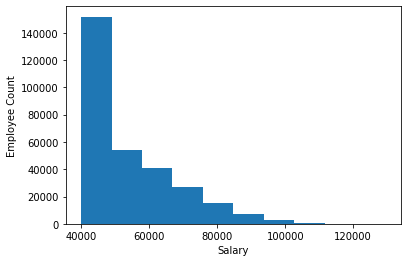

In [11]:
#Creating histogram
plt.hist(salaries)
plt.xlabel('Salary')
plt.ylabel('Employee Count')
plt.show()

### Epilogue

In [12]:
Personal_Pay=pd.read_sql('Select * From Salaries Where emp_no=499942', connection)

Personal_Pay['salary'][0]

40000

In [13]:
# Close connection to database
connection.close()